# P4

Due: 11/4/19, 11:59pm 

In this assignment, we'll look at some of the patterns in tweets by the Washington Nationals.

First, let's get our imports and system set up. 

In [1]:
import math
import xlrd
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import tweepy
import matplotlib.pyplot as plt

### Getting Some Data 

Since we'll be looking at Twitter data, we need to download the data from Twitter!

Twitter provides an API for downloading tweet data in large batches.  The `tweepy` package makes it fairly easy to use.

## Question 0 

You need to install `tweepy`. 

Using the Anaconda Prompt you can install `tweepy` with the following command. 

```bash 
conda install -c conda-forge tweepy
```


Instructions on using tweepy is available [here](https://tweepy.readthedocs.io/en/v3.5.0/index.html), but you will also get some example code.

Twitter requires you to have authentication keys to access their API. To get your keys, you'll have to sign up as a Twitter developer.

<span style="color:red">*Note, it may take over a day for your Twitter developer account to be approved, make sure to give yourself time to complete the assignment.*</span>

## Question 1 

Follow these instructions to get your keys:

1. [Create a Twitter account](https://twitter.com).  You can use an existing account if you have one.
2. Under account settings, add your phone number to the account.
3. [Create a Twitter developer account](https://dev.twitter.com/resources/signup).  Attach it to your Twitter account.  You can indicate that you are a students and this is to be used for educational purposes. 
4. Once you're logged into your developer account, [create an application for this assignment](https://apps.twitter.com/app/new).  You can call it whatever you want, and you can write any URL when it asks for a web site.
5. On the page for that application, find your Consumer Key and Consumer Secret.
6. On the same page, create an Access Token.  Record the resulting Access Token and Access Token Secret.
7. Edit the file `keys.json` and replace the placeholders with your keys.  **Don't turn in that file.**

## IMPORTANT NOTE.  DO NOT SKIP ME.

If someone has your authentication keys, they can access your Twitter account and post as you!  So don't give them to anyone, and **don't write them down in this notebook**.  The usual way to store sensitive information like this is to put it in a separate file and read it programmatically.  That way, you can share the rest of your code without sharing your keys.  That's why we're asking you to put your keys in `keys.json` for this assignment.

## SECOND IMPORTANT NOTE

Twitter limits developers to a certain rate of requests for data.  If you make too many requests in a short period of time, you'll have to wait awhile (around 15 minutes) before you can make more.  So carefully follow the code examples you see and don't rerun cells without thinking.  Instead, always save the data you've collected to a file.  You are provided templates to help you do that.

### Example code 

In the example below, load some tweets by @packers. Run it, inspect the output, and read the code.

In [2]:
ds_tweets_save_path = "Packers_recent_tweets.pkl"
from pathlib import Path
# Guarding against attempts to download the data multiple times:
if not Path(ds_tweets_save_path).is_file():
    import json
    # Loading your keys from keys.json (which you should have filled
    # in in question 1):
    with open("keys.json") as f:
        keys = json.load(f)
    import tweepy

    # Authenticating:
    auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])
    auth.set_access_token(keys["access_token"], keys["access_token_secret"])
    api = tweepy.API(auth)

    # Getting as many recent tweets by @packers as Twitter will let us have:
    example_tweets = list(tweepy.Cursor(api.user_timeline, id="packers").items())

    # Saving the tweets to a file as "pickled" objects:
    with open(ds_tweets_save_path, "wb") as f:
        import pickle
        pickle.dump(example_tweets, f)

# Re-loading the results:
with open(ds_tweets_save_path, "rb") as f:
    import pickle
    example_tweets = pickle.load(f)

Inspect several of the tweet objects, see what form they take what information is stored, where is it stored. 

In [3]:
# Looking at one tweet object, which has type Status:
example_tweets[0]

Status(_json={'created_at': 'Tue Nov 05 00:53:05 +0000 2019', 'id': 1191518766263394304, 'id_str': '1191518766263394304', 'text': 'Win the ultimate gameday experience for an upcoming home game in @cousinssubs Best Seats in the House Sweeps!\n\n👉… https://t.co/bg3yaz2Zz1', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'cousinssubs', 'name': 'Cousins Subs', 'id': 26074684, 'id_str': '26074684', 'indices': [65, 77]}], 'urls': [{'url': 'https://t.co/bg3yaz2Zz1', 'expanded_url': 'https://twitter.com/i/web/status/1191518766263394304', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [114, 137]}]}, 'source': '<a href="https://www.spredfast.com/" rel="nofollow">Spredfast app</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 35865630, 'id_str': '35865630', 'name': 'Green Bay Packers', 'screen_name': 'packer

Understanding the tweets is hard, let's try another way to make this a bit easier to read. 

In [4]:
import pprint; pprint.pprint(vars(example_tweets[0]))

{'_json': {'contributors': None,
           'coordinates': None,
           'created_at': 'Tue Nov 05 00:53:05 +0000 2019',
           'entities': {'hashtags': [],
                        'symbols': [],
                        'urls': [{'display_url': 'twitter.com/i/web/status/1…',
                                  'expanded_url': 'https://twitter.com/i/web/status/1191518766263394304',
                                  'indices': [114, 137],
                                  'url': 'https://t.co/bg3yaz2Zz1'}],
                        'user_mentions': [{'id': 26074684,
                                           'id_str': '26074684',
                                           'indices': [65, 77],
                                           'name': 'Cousins Subs',
                                           'screen_name': 'cousinssubs'}]},
           'favorite_count': 70,
           'favorited': False,
           'geo': None,
           'id': 1191518766263394304,
           'id_str': '11915

## Question 2

(20 pts) Write code to download all the recent tweets by the Washington National (@Nationals).  Follow our example code if you wish.  Write your code in the form of four **functions** matching the documentation provided.  (You may define additional functions as helpers.)  **Once you've written your functions,** you can run the subsequent cell to download the tweets.

In [5]:
ds_tweets_save_path = "Nationals_recent_tweets.pkl"
def load_keys(path):
    from pathlib import Path
   # Guarding against attempts to download the data multiple times:
    if not Path(ds_tweets_save_path).is_file():
        import json
        # Loading your keys from keys.json (which you should have filled
        # in in question 1):
        with open("keys.json") as f:
            keys = json.load(f)
        return keys        
    """Loads your Twitter authentication keys from a file on disk.
    
    Args:
        path (str): The path to your key file.  The file should
          be in JSON format and look like this (but filled in):
            {
                "consumer_key": "<your Consumer Key here>",
                "consumer_secret":  "<your Consumer Secret here>",
                "access_token": "<your Access Token here>",
                "access_token_secret": "<your Access Token Secret here>"
            }
    
    Returns:
        dict: A dictionary mapping key names (like "consumer_key") to
          key values."""

def download_recent_tweets_by_user(user_account_name, keys):
    auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])
    auth.set_access_token(keys["access_token"], keys["access_token_secret"])
    api = tweepy.API(auth)
    example_1 = list(tweepy.Cursor(api.user_timeline, id=user_account_name).items())
    
    return example_1
    """Downloads tweets by one Twitter user.

    Args:
        user_account_name (str): The name of the Twitter account
          whose tweets will be downloaded.
        keys (dict): A Python dictionary with Twitter authentication
          keys (strings), like this (but filled in):
            {
                "consumer_key": "<your Consumer Key here>",
                "consumer_secret":  "<your Consumer Secret here>",
                "access_token": "<your Access Token here>",
                "access_token_secret": "<your Access Token Secret here>"
            }

    Returns:
        list: A list of Status objects, each representing one tweet."""

def save_tweets(tweets, path):
    with open(path, "wb") as f:
        import pickle
        pickle.dump(tweets, f)
    """Saves a list of tweets to a file in the local filesystem.
    
    This function makes no guarantee about the format of the saved
    tweets, **except** that calling load_tweets(path) after
    save_tweets(tweets, path) will produce the same list of tweets
    and that only the file at the given path is used to store the
    tweets.  (That means you can implement this function however
    you want, as long as saving and loading works!)

    Args:
        tweets (list): A list of tweet objects (of type Status) to
          be saved.
        path (str): The place where the tweets will be saved.

    Returns:
        None"""
    
def load_tweets(path):
    with open(path, "rb") as f:
        import pickle
        example_2 = pickle.load(f)
        
        return example_2
    """Loads tweets that have previously been saved.
    
    Calling load_tweets(path) after save_tweets(tweets, path)
    will produce the same list of tweets.
    
    Args:
        path (str): The place where the tweets were be saved.

    Returns:
        list: A list of Status objects, each representing one tweet."""
"""def get_tweets_with_cache(user_account_name, keys_path):
    Get recent tweets from one user, loading from a disk cache if available.
    
    The first time you call this function, it will download tweets by
    a user.  Subsequent calls will not re-download the tweets; instead
    they'll load the tweets from a save file in your local filesystem.
    All this is done using the functions you defined in the previous cell.
    This has benefits and drawbacks that often appear when you cache data:
    
    +: Using this function will prevent extraneous usage of the Twitter API.
    +: You will get your data much faster after the first time it's called.
    -: If you really want to re-download the tweets (say, to get newer ones,
       or because you screwed up something in the previous cell and your
       tweets aren't what you wanted), you'll have to find the save file
       (which will look like <something>_recent_tweets.pkl) and delete it.
    
    Args:
        user_account_name (str): The Twitter handle of a user, without the @.
        keys_path (str): The path to a JSON keys file in your filesystem.
    
    save_path = "{}_recent_tweets.pkl".format(user_account_name)
    from pathlib import Path
    if not Path(save_path).is_file():
        keys = load_keys(keys_path)
        tweets = download_recent_tweets_by_user(user_account_name, keys)
        save_tweets(tweets, save_path)
    return load_tweets(save_path)    
national_tweets = get_tweets_with_cache("Nationals", "keys.json")
k=len(national_tweets)
#print (k)
print(national_tweets[3])"""


'def get_tweets_with_cache(user_account_name, keys_path):\n    Get recent tweets from one user, loading from a disk cache if available.\n    \n    The first time you call this function, it will download tweets by\n    a user.  Subsequent calls will not re-download the tweets; instead\n    they\'ll load the tweets from a save file in your local filesystem.\n    All this is done using the functions you defined in the previous cell.\n    This has benefits and drawbacks that often appear when you cache data:\n    \n    +: Using this function will prevent extraneous usage of the Twitter API.\n    +: You will get your data much faster after the first time it\'s called.\n    -: If you really want to re-download the tweets (say, to get newer ones,\n       or because you screwed up something in the previous cell and your\n       tweets aren\'t what you wanted), you\'ll have to find the save file\n       (which will look like <something>_recent_tweets.pkl) and delete it.\n    \n    Args:\n      

In [6]:
# When you are done, run this cell and the next to load @National's tweets.
# Note the function get_tweets_with_cache.  You may find it useful
# later.

def get_tweets_with_cache(user_account_name, keys_path):
    """Get recent tweets from one user, loading from a disk cache if available.
    
    The first time you call this function, it will download tweets by
    a user.  Subsequent calls will not re-download the tweets; instead
    they'll load the tweets from a save file in your local filesystem.
    All this is done using the functions you defined in the previous cell.
    This has benefits and drawbacks that often appear when you cache data:
    
    +: Using this function will prevent extraneous usage of the Twitter API.
    +: You will get your data much faster after the first time it's called.
    -: If you really want to re-download the tweets (say, to get newer ones,
       or because you screwed up something in the previous cell and your
       tweets aren't what you wanted), you'll have to find the save file
       (which will look like <something>_recent_tweets.pkl) and delete it.
    
    Args:
        user_account_name (str): The Twitter handle of a user, without the @.
        keys_path (str): The path to a JSON keys file in your filesystem.
    """
    save_path = "{}_recent_tweets.pkl".format(user_account_name)
    from pathlib import Path
    if not Path(save_path).is_file():
        keys = load_keys(keys_path)
        tweets = download_recent_tweets_by_user(user_account_name, keys)
        save_tweets(tweets, save_path)
    return load_tweets(save_path)

In [7]:
national_tweets = get_tweets_with_cache("Nationals", "keys.json")

In [8]:
# If everything is working properly, this should print out
# a Status object (a single tweet).  national_tweets should
# contain around 3000 tweets.
national_tweets[0]

Status(_json={'created_at': 'Tue Nov 05 01:30:05 +0000 2019', 'id': 1191528075533725696, 'id_str': '1191528075533725696', 'text': 'Congratulations to #WorldSeries champion Max Scherzer on being named as an NL Cy Young Award finalist!\n\n#CHAMPS //… https://t.co/erE9VE6eSM', 'truncated': True, 'entities': {'hashtags': [{'text': 'WorldSeries', 'indices': [19, 31]}, {'text': 'CHAMPS', 'indices': [104, 111]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/erE9VE6eSM', 'expanded_url': 'https://twitter.com/i/web/status/1191528075533725696', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}, 'source': '<a href="https://www.spredfast.com" rel="nofollow">Spredfast</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 39419180, 'id_str': '39419180', 'name': 'Washington Nationals', 'screen_name': 'Nationals', 'location': 'Nationa

#### Exploring the dataset
Twitter gives us a lot of information about each tweet, not just its text. You can read the full documentation [here](https://dev.twitter.com/overview/api/tweets). Look at one tweet to get a sense of the information we have available.

## Question 3

(10 pts) Which fields contain:
1. the actual text of a tweet,
2. the time when the tweet was posted, and
3. the source (device and app) from which the tweet was posted?

To answer the question, write functions that extract each field from a tweet.  (Each one should take a single Status object as its argument.)

In [21]:
def extract_text(tweet):
    print(tweet.text)
def extract_time(tweet):
    print(tweet.created_at)
def extract_source(tweet):
    print(tweet.source)
    
    
extract_time(national_tweets[0])    
extract_text(national_tweets[0])
extract_source(national_tweets[0])

2019-11-05 01:30:05
Congratulations to #WorldSeries champion Max Scherzer on being named as an NL Cy Young Award finalist!

#CHAMPS //… https://t.co/erE9VE6eSM
Spredfast


##  Question 4

(10 pts) Write a function called `make_dataframe`.  It should take as its argument a list of tweets like `nationals_tweets` and return a Pandas DataFrame.  The DataFrame should contain columns for all the fields in question 3.  **Use the field names as the names of the corresponding columns.**

In [10]:
def make_dataframe(tweets):
    """Make a DataFrame from a list of tweets, with a few relevant fields.

    
    Args:
        tweets (list): A list of tweets, each one a Status object.
    
    Returns:
        DataFrame: A Pandas DataFrame containing one row for each element
          of tweets and one column for each relevant field."""
    
    
    data_1 = [[tweet.text,tweet.created_at,tweet.source] for tweet in tweets]
    data_2 = pd.DataFrame(data=data_1, 
                    columns=["Text","Time of post","Source"])
    data_2.head(20)
    return data_2

make_dataframe(national_tweets)

,Text,Time of post,Source
0,Congratulations to #WorldSeries champion Max S...,2019-11-05 01:30:05,Spredfast
1,P.S. AtNationals is going to take a much-neede...,2019-11-04 04:52:26,Twitter Web App
2,31 Spring Training games\n162 regular season g...,2019-11-04 04:50:20,Twitter Media Studio
3,"Alexa, play ""Calma"" by @pedrocapo ft. Brian Do...",2019-11-04 04:29:55,Twitter Media Studio
4,RT @Capitals: Unforgettable night.\n\n#ALLCAPS...,2019-11-04 04:21:32,Twitter for iPhone
5,Gonna riiiiiiiiiide 'til I can't no more.\n\n@...,2019-11-04 04:10:22,Twitter Media Studio
6,RT @Capitals: Champions.\n\n#ALLCAPS @National...,2019-11-04 03:30:08,Twitter for iPhone
7,RT @Capitals: This is not real\n\n#NatsRager h...,2019-11-04 03:04:00,Twitter for iPhone
8,Oceans 25.\n\n#CHAMPS // #FIGHTFINISHED https:...,2019-11-04 02:59:08,Twitter for iPhone
9,PUT A #CURLYW IN THE BOOKS!\n\nFINAL // @Capit...,2019-11-04 02:44:38,Twitter for iPhone


##  Question 5

(5 pts) Create a plot showing how many tweets came from each kind of source.  

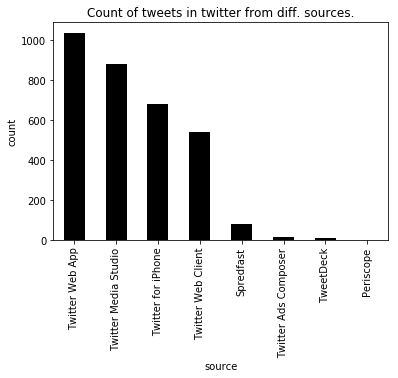

In [11]:
data_3 = make_dataframe(national_tweets)


plt.title('Count of tweets in twitter from diff. sources.',color='black')
plt.xlabel('source')
plt.ylabel('count')

pd.value_counts(data_3['Source']).plot(kind="bar",color='black')

## Question 6 

(10 pts) Write a function that removes the URLs (links) and emojis from the tweet text. By running the code that follows this function you should have then "cleanish" text. 

In [12]:
import re

In [13]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).
    Also, replaces the emoji with nothing. 
    
    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """
    #txt = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', txt)
    txt = re.sub('https\S+', '', txt)  
    emoji_p = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001F42C"    
                           "]+", flags=re.UNICODE)
    txt = re.sub(emoji_p,'', txt)
    return txt

In [14]:
tweet_nats = [tweet.text for tweet in national_tweets]

In [15]:
tweet_nats_without_urls = [remove_url(tweet) for tweet in tweet_nats]

print(tweet_nats_without_urls)

['Congratulations to #WorldSeries champion Max Scherzer on being named as an NL Cy Young Award finalist!\n\n#CHAMPS //… ', 'P.S. AtNationals is going to take a much-needed break this week.\n\nWe’ll be back with more of that fresh #content wh… ', '31 Spring Training games\n162 regular season games\n17 #Postseason games\n5 champagne celebrations\n1 #WorldSeries para… ', 'Alexa, play "Calma" by @pedrocapo ft. Brian Dozier, @JVranaa and the #WorldSeries champion Washington Nationals.… ', 'RT @Capitals: Unforgettable night.\n\n#ALLCAPS @Nationals ', "Gonna riiiiiiiiiide 'til I can't no more.\n\n@ovi8 // #FIGHTFINISHED ", 'RT @Capitals: Champions.\n\n#ALLCAPS @Nationals ', 'RT @Capitals: This is not real\n\n#NatsRager ', 'Oceans 25.\n\n#CHAMPS // #FIGHTFINISHED ', 'PUT A #CURLYW IN THE BOOKS!\n\nFINAL // @Capitals 4, Flames 2\n\n#ALLCAPS // #FIGHTFINISHED ', ' UNLEASH THE FURY!!!!\n\n#ALLCAPS // #FIGHTFINISHED ', '@whatwouldDOOdo @Yan_AGomes @treavturner @Max_Scherzer @PatrickCorbin46 How co

## Question 7 

(10 pts) Write code that will take your list of tweet text `natTweets_no_urls` and creates a list of lists containing the lowercase words for each tweet. 

*Hint: You may want to think about performing the operations on a single tweet text `natTweets_no_urls[0]` - convert it to all lower case, break it into individual words.  Think about String methods https://docs.python.org/3.7/library/stdtypes.html#string-methods* 

*Hint: Once you get the list of words from a single tweet text, collect all the tweets texts in another list.* 

    `[['test',
      'string',
      'text'],
     ['hello',
      'world']]`

In [16]:
data_4 = []

for i in tweet_nats_without_urls:
    i = i.casefold()
    #i = re.sub('[^A-Za-z0-9]+', ' ',i)
    #i = re.sub(" \d+", '',i)
    #i = i.strip()
    data_4.append(i.split(' '))
    
print(data_4)

[['congratulations', 'to', '#worldseries', 'champion', 'max', 'scherzer', 'on', 'being', 'named', 'as', 'an', 'nl', 'cy', 'young', 'award', 'finalist!\n\n#champs', '//…', ''], ['p.s.', 'atnationals', 'is', 'going', 'to', 'take', 'a', 'much-needed', 'break', 'this', 'week.\n\nwe’ll', 'be', 'back', 'with', 'more', 'of', 'that', 'fresh', '#content', 'wh…', ''], ['31', 'spring', 'training', 'games\n162', 'regular', 'season', 'games\n17', '#postseason', 'games\n5', 'champagne', 'celebrations\n1', '#worldseries', 'para…', ''], ['alexa,', 'play', '"calma"', 'by', '@pedrocapo', 'ft.', 'brian', 'dozier,', '@jvranaa', 'and', 'the', '#worldseries', 'champion', 'washington', 'nationals.…', ''], ['rt', '@capitals:', 'unforgettable', 'night.\n\n#allcaps', '@nationals', ''], ['gonna', 'riiiiiiiiiide', "'til", 'i', "can't", 'no', 'more.\n\n@ovi8', '//', '#fightfinished', ''], ['rt', '@capitals:', 'champions.\n\n#allcaps', '@nationals', ''], ['rt', '@capitals:', 'this', 'is', 'not', 'real\n\n#natsrager

## Question 8 

(10 pts) Write code to take your list of lists of words and count the number of times each word appears. 

You may want to look at using `itertools` to flatten the list. Also, look at the built-in Python library `collections`, which helps create a special type of a Python dictonary. The `collection.Counter` object has a useful built-in method `most_common` that will return the most commonly used words and the number of times that they are used.

In [17]:
import itertools
import collections
data_5 = []
data_5 = list(itertools.chain(*data_4))
coll_counter = collections.Counter()

for j in data_5:
    coll_counter[j] = coll_counter[j] + 1
data_6 = coll_counter.most_common()

print(data_6)


[('', 3939), ('the', 1606), ('//', 1155), ('in', 787), ('to', 775), ('of', 662), ('a', 656), ('rt', 560), ('#nats', 525), ('is', 426), ('and', 417), ('for', 406), ('you', 311), ('#stayinthefight', 289), ('#onepursuit', 289), ('this', 270), ('we', 252), ('on', 245), ('at', 243), ('with', 223), ('his', 213), ('has', 209), ('game', 182), ('rendon', 179), ('our', 162), ('2', 157), ('soto', 154), ('//…', 153), ('anthony', 145), ('your', 142), ('@mlb', 138), ('1', 135), ('last', 132), ('have', 130), ('3', 129), ('juan', 125), ('4', 124), ('are', 121), ('from', 120), ('it', 118), ('nationals', 113), ('@nationals', 109), ('just', 108), ('hit', 106), ('0', 106), ('...', 105), ('washington', 104), ('max', 103), ('@natsparkservice:', 103), ('nats', 100), ('that', 97), ('turner', 95), ('best', 94), ('since', 94), ('hr', 94), ('all', 93), ('trea', 93), ('an', 91), ('rbi', 91), ('park', 89), ('been', 88), ('5', 87), ('up', 86), ('6', 85), ('baseball', 82), ('first', 81), ('time', 80), ('more', 79), 

## Question 9 

(5 pts) Plot the top 30 most frequently used words with their word counts.  

*You may want to import the information from above into a Dataframe and use your normal plotting tools*

Text(0.5, 1.0, 'Graph for the word used vs count of the word')

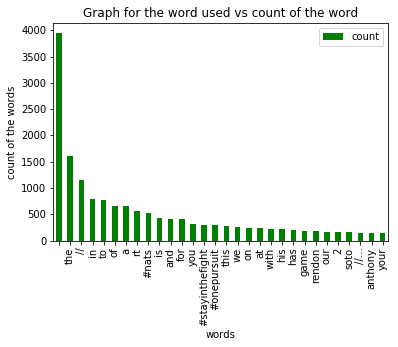

In [18]:
pd.DataFrame(data_6[:30],columns=['word','count']).set_index('word').plot(kind='bar',color = 'green');

plt.xlabel("words")
plt.ylabel("count of the words")
plt.title("Graph for the word used vs count of the word")


## Bonus 

(5 pts) You may see a number of very common words as the most common, e.g., the, in, to, of, etc.  You may want to remove those common words, these are typically referred to as "stop words" in the text analysis communities. 

The python package `nltk` is used for text analysis.  It provides a list of "stop words".  Re-analyze the tweet text by removing stop words from consideration, and plot the 30 most popular words with their frequencies. 



In [19]:
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')

data_7 = []
coll_counter = collections.Counter()
data_7 = [x for x in data_5 if not x in stopwords.words('english')]

for k in data_7:
    coll_counter[k] = coll_counter[k] + 1
data_8 = coll_counter.most_common()    

print(data_8)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sdanda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('', 3939), ('//', 1155), ('rt', 560), ('#nats', 525), ('#stayinthefight', 289), ('#onepursuit', 289), ('game', 182), ('rendon', 179), ('2', 157), ('soto', 154), ('//…', 153), ('anthony', 145), ('@mlb', 138), ('1', 135), ('last', 132), ('3', 129), ('juan', 125), ('4', 124), ('nationals', 113), ('@nationals', 109), ('hit', 106), ('0', 106), ('...', 105), ('washington', 104), ('max', 103), ('@natsparkservice:', 103), ('nats', 100), ('turner', 95), ('best', 94), ('since', 94), ('hr', 94), ('trea', 93), ('rbi', 91), ('park', 89), ('5', 87), ('6', 85), ('baseball', 82), ('first', 81), ('time', 80), ('-', 79), ('career', 78), ('team', 76), ('eaton', 73), ('#worldseries', 72), ('scherzer', 70), ('coming', 69), ('7', 68), ('2019', 67), ('8', 67), ('one', 66), ("we're", 65), ('may', 65), ('need', 65), ('adam', 64), ('nl', 61), ('howie', 61), ('robles', 61), ('get', 60), ('everything', 60), ('@mlb:', 59), ('@natsacademy:', 59), ('back', 57), ('go', 57), ('4,', 55), ('5,', 55), ('stephen', 55), 

Text(0.5, 1.0, 'Graph for the word used vs count of the word')

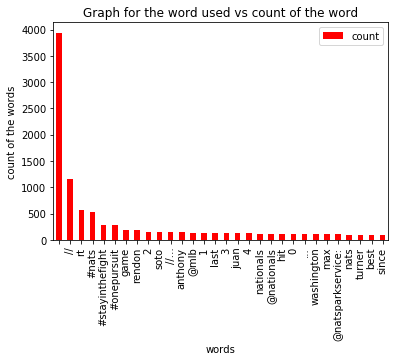

In [20]:
pd.DataFrame(data_8[:30], columns=['word','count']).set_index('word').plot(kind='bar',color = 'red');

plt.xlabel("words")
plt.ylabel("count of the words")
plt.title("Graph for the word used vs count of the word")